# TNE 2: Principal Component Analysis

The purpose of this tutorial is to use Principal Component Analysis (PCA) 
for dimension reduction applied to images.


In [175]:
from pylab import *
#import numpy as np
#import matplotlib.pyplot as plt

import numpy as np
from numpy import linalg as la

## 1. Application: handwritten digits recognition 5 & 6
We load 2 matrices which contain each a sequence of examples of 16x16 images of handwritten digits which are 5 and 6 here. Each line of the matrix contains 256 pixel values coding for the gray level of a 16x16 image.

In [176]:
train_5 = np.loadtxt('train_5.txt',delimiter=',')   # 556 samples
train_6 = np.loadtxt('train_6.txt',delimiter=',')   # 664 samples

#### Examples of images:

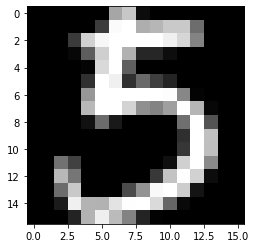

In [177]:
# Digit 5
n=7;
I = np.reshape(train_5[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

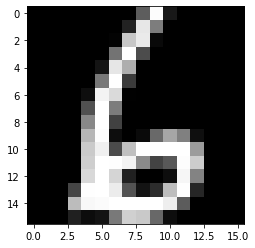

In [178]:
# Digit 6
n=2;
I = reshape(train_6[n,:],(16,16))

plt.imshow(I,cmap='gray')
plt.show()

#### Separating the training and test sets

We keep in the training set the 145 first images of 5s and the 200 first
images of 6s:

In [179]:
x_train_brut = np.vstack((train_5[:145,:], train_6[:200,:]))
N_train = np.size(x_train_brut,axis=0)
class_train = np.ones((345,1))   # label 1 for digit 6
class_train[:145] = 0       # label 0 for digit 5

x_test_brut = np.vstack((train_5[145:,:], train_6[200:,:]))
N_test = np.size(train_5,axis=0)+np.size(train_6,axis=0)-N_train

## 2. Principal Component Analysis

The purpose of this part is to observe the respective contributions of
each component of a PCA of images of 5. The function `sklearn.decomposition.PCA` of `scikit-learn` is available. In practice, one must first estimate the mean vector and then work with centered data. 

### Documentation
First have a look at
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    

In [180]:
# Principal component analysis
moy_train = x_train_brut.mean(axis=0)  # all the data, 5 & 6
x_train_centre = x_train_brut-np.tile(moy_train,(N_train,1))

# PCA from scikit-learn
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(x_train_centre)  # you may forget centering that is done by sklearn PCA

singval = pca.singular_values_   # eigenvalues
comp = pca.components_           # principal components
proj = pca.transform(x_train_centre)  # computes the projection coefficients

In [181]:
(proj[7,:] @ comp).shape

(256,)

### Display the averaged images of 5 & 6 respectively

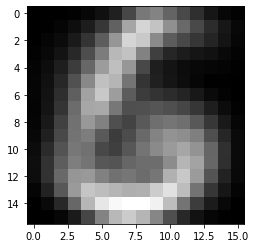

In [182]:
I_moy = np.reshape(moy_train,(16,16))   # averaged image = mean 
plt.imshow(I_moy,cmap = 'gray')
plt.show()

### Display an example rebuilt from the 1st component only

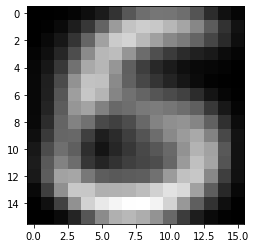

In [183]:
n=7   # choice of image no n=12 or any other

I = I_moy + proj[n,0]*np.reshape(comp[0,:],(16,16))  # adding the 1st PCA component 
plt.imshow(I,cmap='gray')
plt.show()

### Exercise 1: PCA & approximation

1. Read the documentation of function `PCA` and identify the input and output parameters.
2. Implement a progressive reconstruction of an image of digit 5 by adding the successive 
contribution of principal components.
3. Observe graphical results. How many components are necessary to obtain a 
reconstruction that you may consider as acceptable? nice? very nice?
4. Optional question: do the same for 6.


<u>Answer 1</u> : Description of the PCA function :
- Inputs parameters:    
  - n_components = Number of components to keep. Defaults to all components
  - copy = If False, data passed to fit are overwritten and running fit(X).transform(X) will not yield the expected results, use fit_transform(X) instead
  - whiten = the components_ vectors are multiplied by the square root of n_samples and then divided by the singular values to ensure uncorrelated outputs with unit component-wise variances.
  - svd_solver = Solver in {'auto', 'full', 'arpack', 'randomized'}
  - tol = Tolerance for singular values computed by svd_solver == ‘arpack’. Must be of range [0.0, infinity[
  - iterated_power = Number of iterations for the power method computed by svd_solver == ‘randomized’. Must be of range [0, infinity[.
  - n_oversamples = This parameter is only relevant when svd_solver="randomized". It corresponds to the additional number of random vectors to sample the range of X so as to ensure proper conditioning
  - power_iteration_normalizer = Power iteration normalizer for randomized SVD solver. Not used by ARPACK. See randomized_svd for more details.
  - random_state = Used when the ‘arpack’ or ‘randomized’ solvers are used. Pass an int for reproducible results across multiple function calls
- Output attributes :
  - components_ = Principal axes in feature space, representing the directions of maximum variance in the data. Equivalently, the right singular vectors of the centered input data, parallel to its eigenvectors. The components are sorted by explained_variance_
  - explained_variance_ = The amount of variance explained by each of the selected components. The variance estimation uses n_samples - 1 degrees of freedom. Equal to n_components largest eigenvalues of the covariance matrix of X
  - explained_variance_ratio_ = Percentage of variance explained by each of the selected components. If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0.
  - singular_values_ = The singular values corresponding to each of the selected components. The singular values are equal to the 2-norms of the n_components variables in the lower-dimensional space
  - mean_ = Per-feature empirical mean, estimated from the training set. Equal to X.mean(axis=0).
  - n_components_ = The estimated number of components. When n_components is set to ‘mle’ or a number between 0 and 1 (with svd_solver == ‘full’) this number is estimated from input data. Otherwise it equals the parameter n_components, or the lesser value of n_features and n_samples if n_components is None
  - n_features_ = Number of features in the training data
  - n_samples_ = Number of samples in the training data
  - noise_variance_ = The estimated noise covariance following the Probabilistic PCA model from Tipping and Bishop 1999
  - n_features_in_ = Number of features seen during fit
  - feature_names_in_ = Names of features seen during fit. Defined only when X has feature names that are all strings

<u>Answer 2</u> :

In [184]:
def progressive_reconstruction(n, n_contrib):
    """Progressive reconstruction of an image by adding successive contributions of the PCA

    Args:
        n (int): Input image
        n_contrib (int): Number of PCA contributions to add to the mean image
        
    Returns:
        np.ndarray: image reconstructed 
    """
    I = I_moy
    for i in range(n_contrib):
        I += + proj[n,i]*np.reshape(comp[i,:],(16,16))
    return I

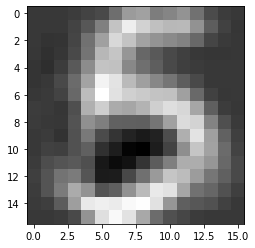

In [185]:
reconstructed_image = progressive_reconstruction(7,10)
plt.imshow(reconstructed_image, cmap="gray")
plt.show()


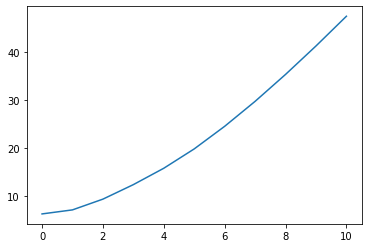

In [186]:
# Reconstruction error
x = [i for i in range(11)]
y = [np.linalg.norm(progressive_reconstruction(7,i)-np.reshape(train_5[n,:],(16,16))) for i in x]
plt.plot(x,y)
plt.show()

### Exercise 2: PCA & classification
1. Use `proj[0:2,:]` as the coordinates of a point representing each sample
of the training set in a plane. Display the cloud of points associated to
digits 5 and 6 by using 2 different colors.
2. Comment on the repartition of points in the plane. 
3. Do you see how this PCA step makes possible the use of a much simpler classification? 
What would you propose as an alternative to logistic regression of TP3 then?


In [187]:
# Exercise 2

## Beyong this lab

Have a look at other examples of applications, like

http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py
    